# Pymaceuticals Inc.
---

### Analysis
Our data included 248 mice with 1892 timepoints. The sex of the mice were split into male with 51% and female 49%.
The four primary treatments of interest were: Capomulin, Ramicane, Infubinol, Cetamine. For which Capomulin and Ramicane were seen to
be more effective.
The only Drug Regimen that has an outliner is Infobinol at: 36.32 tumor Volume,
The study that used Capomulin shows that tumor volume was directly proportional to the weight of mouse.
Results were consistent for all drugs irrespective of gender of mice.
The overall weight of the mice was positively related to the sixe of the tumor, with heavier mice having larger tumors and the vice versa.



 

In [36]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np  


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
full_data=pd.merge(study_results,mouse_metadata,on="Mouse ID",how="left")

# Display the data table for preview
full_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [14]:
# Checking the number of mice.
mouse_count=full_data['Mouse ID'].nunique()
mouse_count


249

In [15]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mice=full_data.loc[full_data.duplicated(subset=['Mouse ID','Timepoint']),'Mouse ID'].unique()
duplicate_mice

array(['g989'], dtype=object)

In [17]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_mice_data=full_data.loc[full_data['Mouse ID']=='g989']
duplicate_mice_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [31]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_data=full_data[full_data['Mouse ID']!='g989']
cleaned_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [32]:
# Checking the number of mice in the clean DataFrame.
clean_mice_count=cleaned_data['Mouse ID'].nunique()
clean_mice_count

248

## Summary Statistics

In [33]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean_tumor_vol=cleaned_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median_tumor_vol=cleaned_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
var_tumor_vol=cleaned_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
std_tumor_vol=cleaned_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem_tumor_vol=cleaned_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
summary_stats=pd.DataFrame({'Mean Tumor Volume': mean_tumor_vol,
                            'Median Tumor Volume': median_tumor_vol,
                            'Tumor Volume Variance': var_tumor_vol,
                            'Tumor Volume Std. Dev.': std_tumor_vol,
                            'Tumor Volume Std. Err.': sem_tumor_vol})
summary_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [34]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
advanced_summary=cleaned_data.groupby('Drug Regimen').agg({'Tumor Volume (mm3)':['mean','median','var','std','sem']})
# Using the aggregation method, produce the same summary statistics in a single line
advanced_summary

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

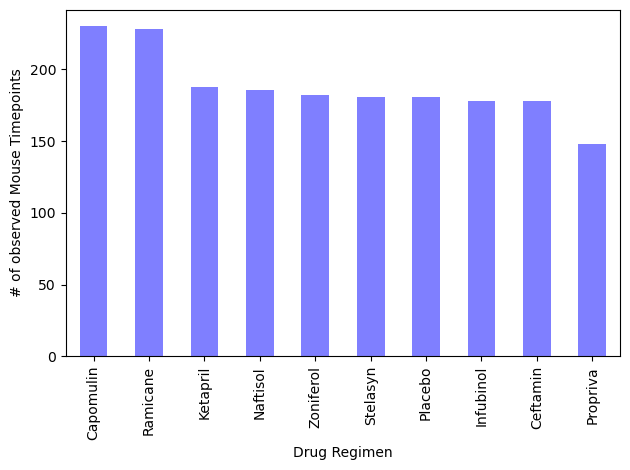

In [35]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_regimen_data=cleaned_data['Drug Regimen'].value_counts()
drug_regimen_data.plot(kind='bar',color='blue',alpha=0.5,align='center',width=0.5)
plt.xlabel('Drug Regimen')
plt.ylabel('# of observed Mouse Timepoints')
plt.tight_layout()

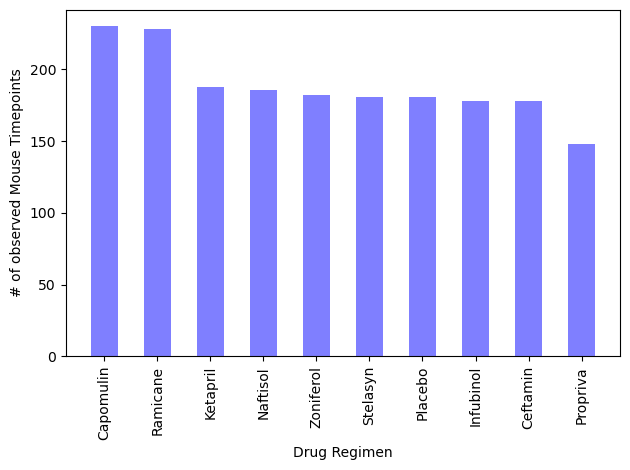

In [37]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(drug_regimen_data.index,drug_regimen_data,color='blue',alpha=0.5,width=0.5)
plt.xticks(rotation=90)
plt.xlabel('Drug Regimen')
plt.ylabel('# of observed Mouse Timepoints')
plt.tight_layout()
plt.show()


Text(0.5, 1.0, 'Female Vs Male Mice Distribution')

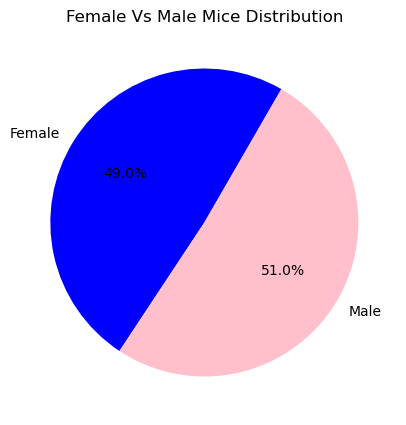

In [40]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
sex=cleaned_data.groupby(["Sex"])["Sex"].count()
# Make the pie chart
sex.plot(kind='pie',autopct='%1.1f%%',startangle=60,figsize=(5,5),colors=['blue','pink'])
plt.ylabel('')
plt.title('Female Vs Male Mice Distribution')

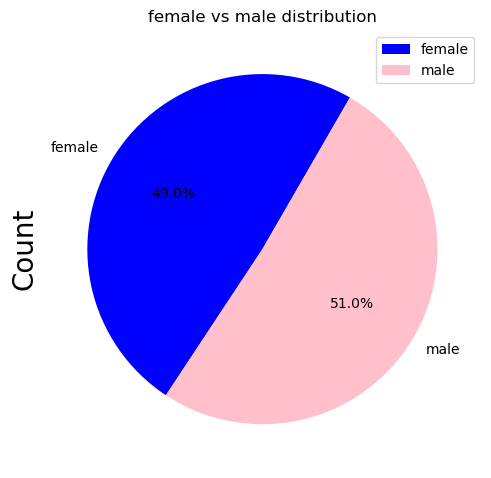

In [42]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study
plt.figure(figsize=(5,5))
plt.pie(sex, labels=("female","male"),autopct='%1.1f%%',startangle=60,colors=['blue','pink'])
plt.title('female vs male distribution')
plt.ylabel('Count', size=20)
plt.tight_layout()
plt.legend(loc='upper right')
plt.show()



## Quartiles, Outliers and Boxplots

In [46]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
greatest_timepoint=cleaned_data[cleaned_data['Drug Regimen'].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])].groupby('Mouse ID')["Timepoint"].max()
greatest_timepoint

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_vol=pd.merge(greatest_timepoint,cleaned_data,on=['Mouse ID','Timepoint'],how='left')
final_tumor_vol

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a275,45,62.999356,3,Ceftamin,Female,20,28
3,a411,45,38.407618,1,Ramicane,Male,3,22
4,a444,45,43.047543,0,Ramicane,Female,10,25
...,...,...,...,...,...,...,...,...
95,y769,45,68.594745,4,Ceftamin,Female,6,27
96,y793,45,31.896238,2,Capomulin,Male,17,17
97,y865,45,64.729837,3,Ceftamin,Male,23,26
98,z578,45,30.638696,0,Ramicane,Male,11,16


In [47]:
# Put treatments into a list for for loop (and later for plot labels)
treatments=["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for treatment in treatments:
    volume=final_tumor_vol.loc[final_tumor_vol['Drug Regimen']==treatment,'Tumor Volume (mm3)']
    tumor_vol.append(volume)
    # Locate the rows which contain mice on each drug and get the tumor volumes
    quartiles=volume.quantile([.25,.5,.75])
    iqr=quartiles[0.75]-quartiles[0.25]
    lower_bound=quartiles[0.25]-(1.5*iqr)
    upper_bound=quartiles[0.75]+(1.5*iqr)
    # Determine outliers using upper and lower bounds
    outliers=volume.loc[(volume<lower_bound)|(volume>upper_bound)]

    # add subset


    # Determine outliers using upper and lower bounds
    print(f"{treatment} potential outliers: {outliers}")

Capomulin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol potential outliers: 15    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


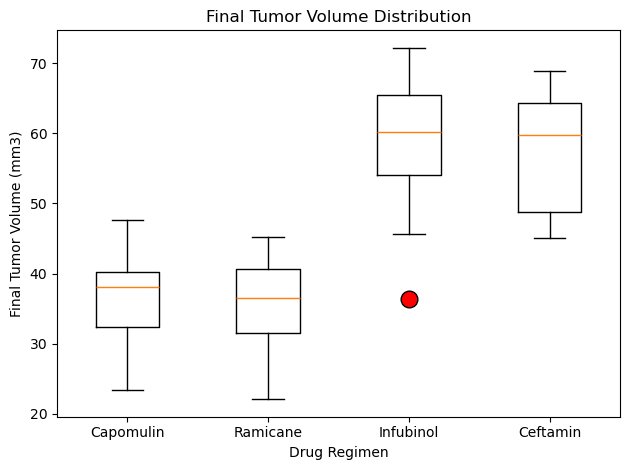

In [49]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
plt.boxplot(tumor_vol,tick_labels=treatments,flierprops=dict(marker='o',markerfacecolor='r',markersize=12))
plt.ylabel('Final Tumor Volume (mm3)')
plt.xlabel('Drug Regimen')
plt.title('Final Tumor Volume Distribution')
plt.tight_layout()
plt.show()



## Line and Scatter Plots

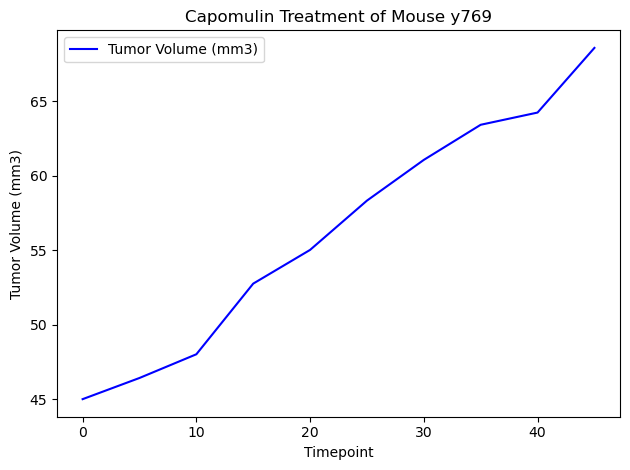

In [50]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
plt.lineplot=cleaned_data.loc[cleaned_data['Mouse ID']=='y769'].plot(kind='line',x='Timepoint',y='Tumor Volume (mm3)',color='blue')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin Treatment of Mouse y769')
plt.tight_layout()
plt.show()

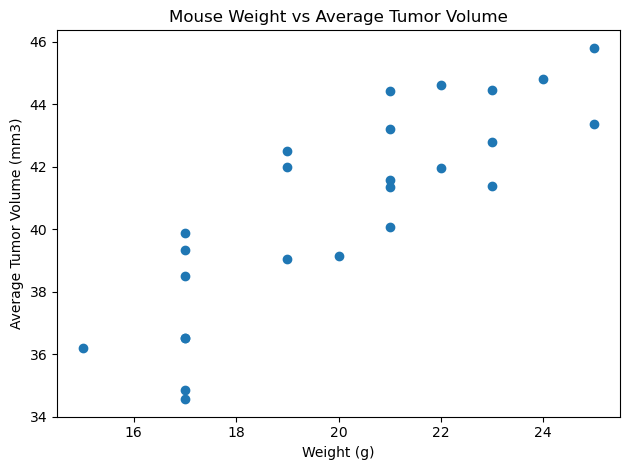

In [53]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
scatter_df=cleaned_data.loc[cleaned_data['Drug Regimen']=='Capomulin',:]
x_value=scatter_df.groupby('Mouse ID')['Weight (g)'].mean()
y_value=scatter_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
plt.scatter(x_value,y_value)


plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs Average Tumor Volume')
plt.tight_layout()
plt.show()



## Correlation and Regression

The correlation between mouse weight and average tumor volume is 0.84


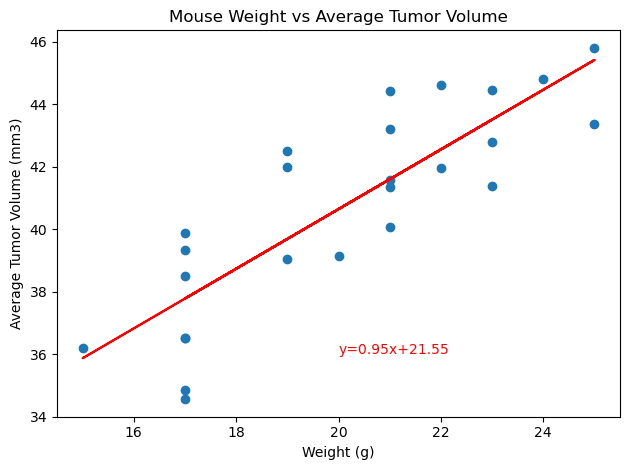

In [54]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation=round(st.pearsonr(scatter_df.groupby('Mouse ID')['Weight (g)'].mean(),scatter_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean())[0],2)
print(f"The correlation between mouse weight and average tumor volume is {correlation}")


(slope,intercept,rvalue,pvalue,stderr)=st.linregress(x_value,y_value)
regress_values=x_value*slope+intercept
line_eq='y=' +str(round(slope,2)) + 'x+' + str(round(intercept,2))
plt.scatter(x_value,y_value)
plt.plot(x_value,regress_values,color='red')
plt.annotate(line_eq,(20,36),color='red')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs Average Tumor Volume')
plt.tight_layout()
plt.show()

